___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (9,4)
pd.set_option('display.max_columns', 200)


In [29]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

### Data Wrangling

In [37]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.sample()

Unnamed: 0  Clothing ID  Age            Title  \
18929       18929         1028   32  Great in theory   

                                                                                                                                                                                                   Review Text  \
18929  1. the wide leg/crop is a cool trend. but not great on me. i'm pretty standard in size/build: 5'6", 135 lbs,, size 4. i felt like i just looked oddly shaped with them on.\r\n2. and maybe this is t...   

       Rating  Recommended IND  Positive Feedback Count Division Name  \
18929       3                0                        2       General   

      Department Name Class Name  
18929         Bottoms      Jeans

In [38]:
df.drop(columns=["Unnamed: 0"], inplace=True)
df.sample()

Clothing ID  Age                             Title  \
7099         1117   65  Just what i was searching for...   

                                                                                                                                                                                                  Review Text  \
7099  I've been searching for a pretty & soft faux fur coat - finally found it hanging there in retailer! there was only one - a size small. it looked gorgeous, but thought i could use it a bit roomier....   

      Rating  Recommended IND  Positive Feedback Count   Division Name  \
7099       5                1                        4  General Petite   

     Department Name Class Name  
7099         Jackets  Outerwear

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [39]:
df["Recommended IND"].value_counts(normalize=True)

1    0.822362
0    0.177638
Name: Recommended IND, dtype: float64

In [40]:
# The dataframe is definitely imbalanced

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [41]:
df.rename(columns={"Review Text": "Review", "Recommended IND": "Recommend"}, inplace=True, )

In [42]:
df = df[["Review", "Recommend"]]
df

Review  \
0                                                                                                                                                        Absolutely wonderful - silky and sexy and comfortable   
1      Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length...   
2      I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...   
3                                                                                 I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!   
4             This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!   
...                                                                                                                                                                                                        ...   
23481                                                                      I was very happy to snag this dress at such a great price! it's very easy to slip on and has a very flattering cut and color combo.   
23482  It reminds me of maternity clothes. soft, stretchy, shiny material. cut is flattering and drapes nicely. i only found one button to close front... looked awkward. nice long sleeves.\nnot for me bu...   
23483  This fit well, but the top was very see through. this never would have worked for me. i'm glad i was able to try it on in the store and didn't order it online. with different fabric, it would have...   
23484  I bought this dress for a wedding i have this summer, and it's so cute. unfortunately the fit isn't perfect. the medium fits my waist perfectly, but was way too long and too big in the bust and sh...   
23485                                                                                           This dress in a lovely platinum is feminine and fits perfectly, easy to wear and comfy, too! highly recommend!   

       Recommend  
0              1  
1              1  
2              0  
3              1  
4              1  
...          ...  
23481          1  
23482          1  
23483          0  
23484          1  
23485          1  

[23486 rows x 2 columns]

---
---


### Missing Value Detection

In [43]:
df.isna().sum()

Review       845
Recommend      0
dtype: int64

In [44]:
df[df["Review"].isna()]

Review  Recommend
92       NaN          1
93       NaN          1
98       NaN          1
135      NaN          1
142      NaN          1
...      ...        ...
23258    NaN          1
23301    NaN          1
23303    NaN          1
23470    NaN          1
23480    NaN          1

[845 rows x 2 columns]

In [45]:
df = df.dropna(subset = ['Review'])
df.reset_index(drop=True, inplace=True)
df

Review  \
0                                                                                                                                                        Absolutely wonderful - silky and sexy and comfortable   
1      Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length...   
2      I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...   
3                                                                                 I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!   
4             This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!   
...                                                                                                                                                                                                        ...   
22636                                                                      I was very happy to snag this dress at such a great price! it's very easy to slip on and has a very flattering cut and color combo.   
22637  It reminds me of maternity clothes. soft, stretchy, shiny material. cut is flattering and drapes nicely. i only found one button to close front... looked awkward. nice long sleeves.\nnot for me bu...   
22638  This fit well, but the top was very see through. this never would have worked for me. i'm glad i was able to try it on in the store and didn't order it online. with different fabric, it would have...   
22639  I bought this dress for a wedding i have this summer, and it's so cute. unfortunately the fit isn't perfect. the medium fits my waist perfectly, but was way too long and too big in the bust and sh...   
22640                                                                                           This dress in a lovely platinum is feminine and fits perfectly, easy to wear and comfy, too! highly recommend!   

       Recommend  
0              1  
1              1  
2              0  
3              1  
4              1  
...          ...  
22636          1  
22637          1  
22638          0  
22639          1  
22640          1  

[22641 rows x 2 columns]

In [46]:
df.isna().sum()

Review       0
Recommend    0
dtype: int64

In [47]:
df.dtypes

Review       object
Recommend     int64
dtype: object

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [48]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [49]:
df2 = df.copy()

In [16]:
stop_words = stopwords.words("english")
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [50]:
def cleaning(data):
    
    import re
    
    #1. Removing lbs
    data = re.sub('([\s,\,,\.,\-,\#,\(]\d+\s*(lbs|lb|#|pounds|pound))', 
                  '', 
                  data, 
                  0,
                  re.IGNORECASE)

    #2. Removing cup sizes    
    data = re.sub(r"([\s,\,,\.,\-,\#,\(]([2-3]\d)?\s*\-?(a{2,4}|b{1,4}|c{1,4}|d{1,4}|e{1,4}|f{1,4}|g{1,4})\+*\s?(cup|\-cup|chest)?(?=\W|$))", 
                  ' ',
                  data, 
                  0,
                  re.IGNORECASE)
    data = re.sub(r"(^\d{2}?(a{2,4}|b{1,4}|c{1,4}|d{1,4}|e{1,4}|f{1,4}|g{1,4})\+*(?=\W|$))", 
                  ' ',
                  data, 
                  0,
                  re.IGNORECASE).strip()
    data = re.sub(r"([\s,\,,\.,\-,\#,\(]([2-3]\d)a\+*\s?(cup|\-cup|chest)?(?=\W|$))", 
                  ' ',  
                  data, 
                  0,
                  re.IGNORECASE)
    
    #3. Removing height
    data = re.sub(r"(\d([\'\"]{1,2}|(\s*(ft)\s*\.?\s*)|(\s*foot\s*)|(\s*feet\s*))(\-?\d{1,2}(\.\d)?([\'\"]{1,2})?)?\+?\s*(tall)?)", 
                  ' ',  
                  data, 
                  0,
                  re.IGNORECASE)
    
    #4. Removing size ##
    data = re.sub(r"(size \d{1,2}(\.(5|25))?(\s*\-?\s*\d{1,2})?)", 
                  ' ',  
                  data, 
                  0,
                  re.IGNORECASE)

    data = data.strip()
    
    #5. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")
    
    #6. Tokenize
    text_tokens = word_tokenize(data.lower())
    
    #7. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #8. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #9. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
       
    #10. joining
    return " ".join(text_cleaned)
    

In [51]:
print(cleaning("Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8\".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite."))

love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite


## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


In [52]:
dfClean = df2.copy()

In [53]:
dfClean.Review = dfClean.Review.apply(cleaning)

In [57]:
pd.options.display.max_colwidth = 1000
dfClean.sample(10)

Review  \
19954                                                                                                                                                                                                                                                             love top make look slimmer comfortable well   
4483   absolutely adorable must object previous reviewer stated top fit nothing like model photo found fit exactly like look usually wear xl bought one large price good pas top affords slightly slouchy look top thanks dolman sleeve bit fit say bit better fit midriff model one reviewer stated top make   
17084                   love cut dress honest say initially bought blue color store falling love decided deserved mango colored one well seeing sister sizing tab big work design would say stick usual size amazing pop color especially summer back design gorgeous gold streak running wonderful favor try   
17423                                                                                                                                                                                                                             cute jean got specifically tie lace ankle price also love shade gray bought   
20321                                                                                                                     important thing note skirt true blue black also perfect spring summer early fall super comfy casual yet elegant size run tiny bit small waist elasticized staple cozy chic wardrobe   
1141                                                                                                                                                                                                                                       bought daughter adorable going take waist doesnt look itll perfect   
9074                                                                                                                                                                                                          really love pant ordered online fit well theyre cute edgy fray bottom corduroy material awesome   
7356                                           feel like lot blouse like really needed wow keep lovely well made pretty delicate didnt feel like anything special dont blouse like great find nothing super ordinary fit feel tt l ordered lot room body although didnt like arm hit arent wrist length arent   
132                             love vest color look little brown picture really deep forest green go great jean black pant great piece polished casual style fabric nice soft finish slightly higher hit true natural waist would get fifth star sometimes wear petite size might issue still look good tied   
3068                                                                                                                                                                                                                                                     didnt like itchy fabric looked good model busty girl   

       Recommend  
19954          1  
4483           1  
17084          1  
17423          1  
20321          1  
1141           1  
9074           1  
7356           1  
132            1  
3068           0

### Detect Reviews (positive and negative separately)

In [58]:
dfCleanP = dfClean[dfClean.Recommend == 1]
dfCleanP

Review  \
0                                                                                                                                                                                                                                                                                    absolutely wonderful silky sexy comfortable   
1                                                                                                                                           love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite   
3                                                                                                                                                                                                                                       love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment   
4                                                                                                                                                                                                                 shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt   
6                        aded basket hte last mintue see would look like person store pick went teh darkler color pale hte color really gorgeous turn mathced everythiing trying prefectly little baggy hte x hte msallet size bummer petite decided jkeep though said matvehd everything ejans pant skirt waas trying kept oops   
...                                                                                                                                                                                                                                                                                                                          ...   
22635  wasnt sure ordering skirt couldnt see person first im glad skirt design well made doesnt look feel cheap color isnt blaring offensive red worked pale skin better anticipated wore daughter dance production tall boot sweater got numerous compliment fit true picked petite length skirt slight rather tight pencil fit   
22636                                                                                                                                                                                                                                                          happy snag dress great price easy slip flattering cut color combo   
22637                                                                                                                                                            reminds maternity clothes soft stretchy shiny material cut flattering drape nicely found one button close front looked awkward nice long sleeve maybe others ok   
22639                                                                       bought dress wedding summer cute unfortunately fit isnt perfect medium fit waist perfectly way long big bust shoulder wanted spend money could get tailored felt like might worth side note dress delivered nordstrom tag found much cheaper looking   
22640                                                                                                                                                                                                                                              dress lovely platinum feminine fit perfectly easy wear comfy highly recommend   

       Recommend  
0              1  
1              1  
3              1  
4              1  
6              1  
...          ...  
22635          1  
22636          1  
22637          1  
22639          1  
22640          1  

[18540 rows x 2 columns]

In [59]:
dfCleanN = dfClean[dfClean.Recommend == 0]
dfCleanN

Review  \
2      high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper   
5                                                    love tracy reese dress one petite usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style work returned dress   
10                                                                                                           dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back   
22                                                            first pullover styling side zipper wouldnt purchased knew side zipper large bust side zipper next impossible second tulle feel look cheap slip awkward tight shape underneath look like described sadly returning im sure find something exchange   
25                                                                                                                loved material didnt really look long dress purchased large medium im atleast material foot gap front much wider look felt like dress fell flat returned im usually large med fit better jean   
...                                                                                                                                                                                                                                                                                                         ...   
22606                                                                                                            tried color really pretty fun donset want pair pant looked awful muscular thigh dont think cut falttering population also comfortable looked crotch seemed little low though pant correct size   
22607                                                                                                  wanted love jacket soft great color unfortunately light weight almost like shirt fabric nice heft fabric though nice length accept sleeve short small right size looking something slightly warmer layer   
22617                      purchased good price typically love maeve fabric thin slinky unfortunate way made finding appropriate undergarment difficult add slip helped figured since im losing weight would look better im pound said didnt find figure flattering tummy least one photo bridal shower wore lo   
22634                                                                                                                                                               surprised positive review product terrible cut weird place make look wide skirt also like picture darker heavier material isnt great return   
22638                                                                                                                                                                                                fit well top see never would worked im glad able try store didnt order online different fabric would great   

       Recommend  
2              0  
5              0  
10             0  
22             0  
25             0  
...          ...  
22606          0  
22607          0  
22617          0  
22634          0  
22638          0  

[4101 rows x 2 columns]

### Collect Words (positive and negative separately)

In [60]:
textP = " ".join(i for i in dfCleanP.Review)
textP

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt aded basket hte last mintue see would look like person store pick went teh darkler color pale hte color really gorgeous turn mathced everythiing trying prefectly little baggy hte x hte msallet size bummer petite decided jkeep though said matvehd everything ejans pant skirt waas trying kept oops ordered carbon store pick ton stuff always try used top pair skirt pant everything went color really nice charcoal shimmer went well pencil skirt flare pant etc compaint bit big sleeve long doesnt go petite also bit loose xx kept wil ldecide later since light color already sold

In [61]:
textN = " ".join(i for i in dfCleanN.Review)
textN

'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper love tracy reese dress one petite usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style work returned dress dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back first pullover styling side zipper wouldnt purchased knew side zipper large bust side zipper next impossible second tulle feel look cheap slip awkward tight shape underneath look like described sadly returning im sure find something exchange loved material

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [62]:
from wordcloud import WordCloud

### Recomendeds

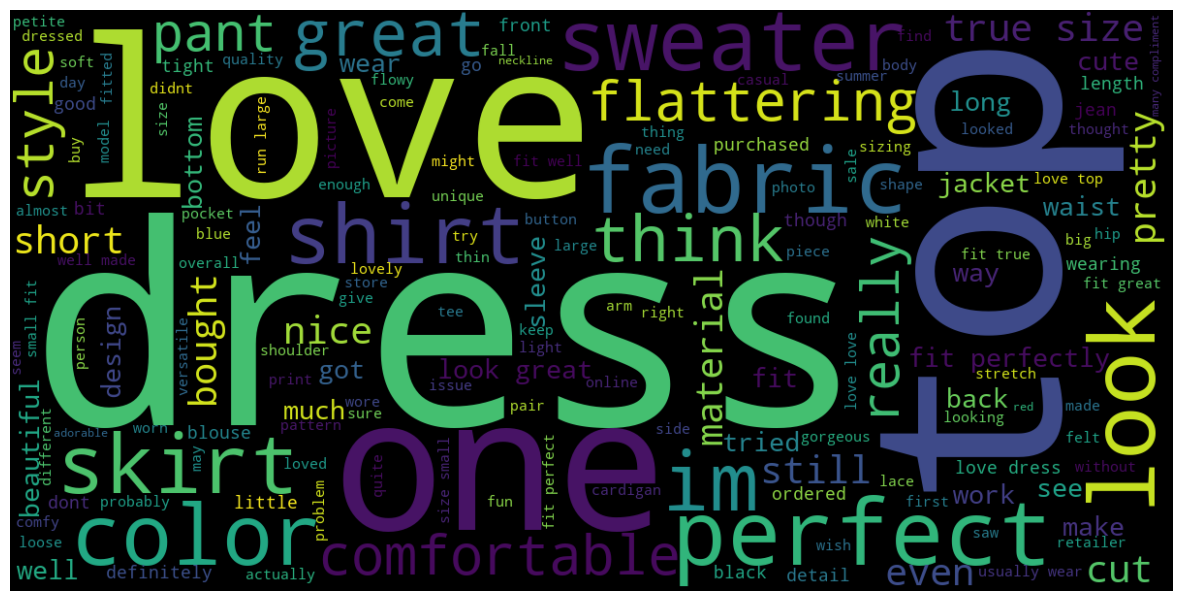

In [65]:
wordcloud = WordCloud(background_color="black", max_words = 400, scale=3).generate(textP)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Not Recomendeds

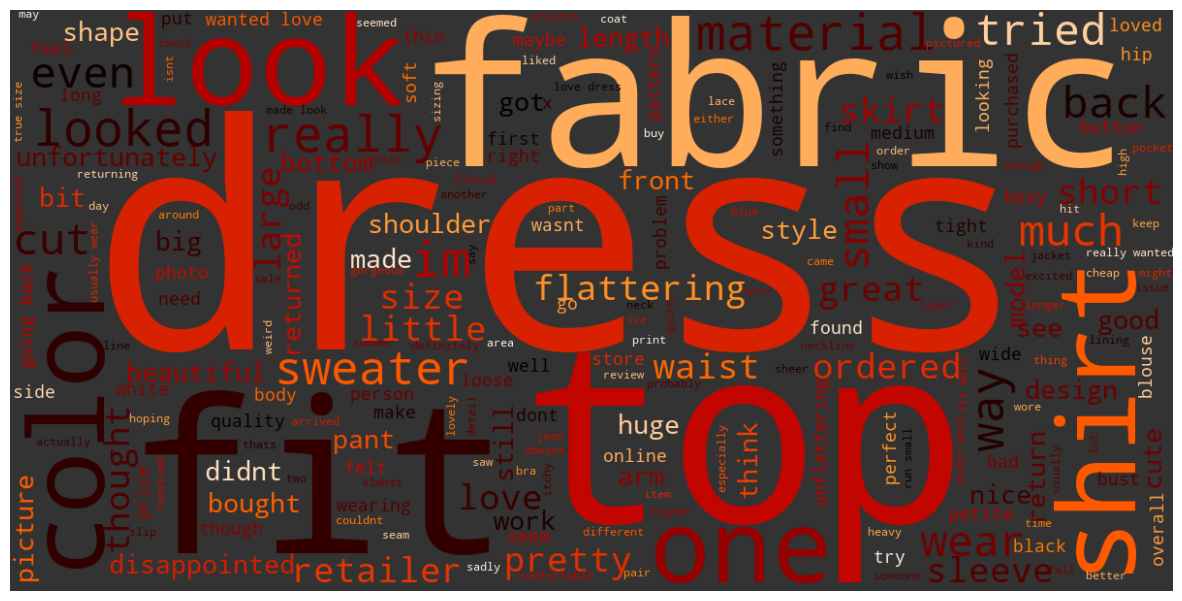

In [70]:
wordcloud = WordCloud(background_color="#333333", max_words = 400, scale=3, colormap='gist_heat').generate(textN)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [72]:
from sklearn.model_selection import train_test_split


In [210]:
X = dfClean.Review.values
y = dfClean.Recommend.values

#The goal in this project is to predict whether customers recommend the product they purchased using the information in 
#their review text.
#Therefore our target is "1" Recomended. So, no need to shift 0 and 1

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 1647)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [212]:
from sklearn.feature_extraction.text import CountVectorizer

In [213]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3, max_df=0.9)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

### TF-IDF

In [214]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [215]:
tf_idf_vectorizer = TfidfVectorizer()
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [216]:
tf_idf_vectorizer.get_feature_names_out()

array(['aaaaandidontwanttopayforshipping', 'aaaaannnnnnd', 'aaaahmazing',
       ..., 'zoom', 'zooming', 'zuma'], dtype=object)

### Eval Function

In [217]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [218]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

In [219]:
scoring= ["accuracy", "f1", "recall", "precision"]


#scoring = {'accuracy': make_scorer(accuracy_score),
#            'precision-neg': make_scorer(precision_score, average=None, labels=["negative"]),
#            'recall-neg': make_scorer(recall_score, average=None, labels = ["negative"]),
#            'f1-neg': make_scorer(f1_score, average=None, labels = ["negative"])}


## Logistic Regression

### CountVectorizer

In [220]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C = 0.01, 
                         max_iter = 1000, 
                         class_weight = "balanced", 
                         random_state = 1647)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=1647)

In [221]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[ 689  131]
 [ 560 3149]]
Test_Set
              precision    recall  f1-score   support

           0       0.55      0.84      0.67       820
           1       0.96      0.85      0.90      3709

    accuracy                           0.85      4529
   macro avg       0.76      0.84      0.78      4529
weighted avg       0.89      0.85      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.57      0.88      0.69      3281
           1       0.97      0.85      0.91     14831

    accuracy                           0.86     18112
   macro avg       0.77      0.87      0.80     18112
weighted avg       0.90      0.86      0.87     18112



In [222]:
model = LogisticRegression(C =0.01, 
                           max_iter=1000, 
                           class_weight= "balanced", 
                           random_state=1647)
scores = cross_validate(model, 
                        X_train_count, 
                        y_train, 
                        scoring = scoring, 
                        cv = 10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, 
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.845683
train_accuracy     0.858191
test_f1            0.899839
train_f1           0.907941
test_recall        0.846605
train_recall       0.854007
test_precision     0.960253
train_precision    0.969147
dtype: float64

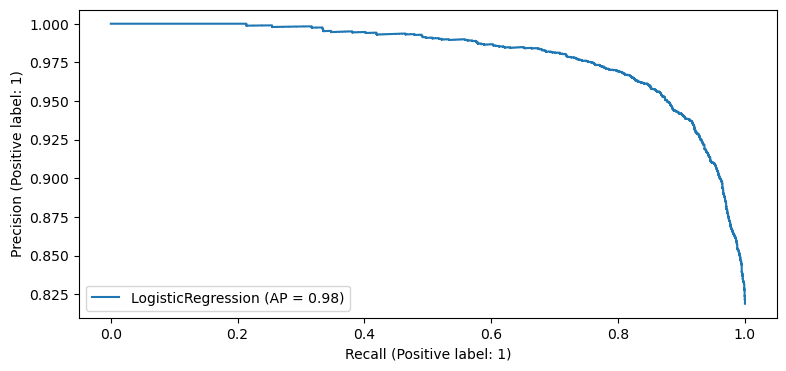

In [223]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

PrecisionRecallDisplay.from_estimator(log, 
                                      X_test_count, 
                                      y_test);

In [224]:
y_pred = log.predict(X_test_count)
y_pred_proba= log.predict_proba(X_test_count)[:,1]

log_AP_count = average_precision_score(y_test, y_pred_proba)
log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [225]:
log = LogisticRegression(C = 0.06, 
                         max_iter = 1000, 
                         random_state = 1647, 
                         class_weight = "balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.06, class_weight='balanced', max_iter=1000,
                   random_state=1647)

In [226]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[ 693  127]
 [ 605 3104]]
Test_Set
              precision    recall  f1-score   support

           0       0.53      0.85      0.65       820
           1       0.96      0.84      0.89      3709

    accuracy                           0.84      4529
   macro avg       0.75      0.84      0.77      4529
weighted avg       0.88      0.84      0.85      4529

Train_Set
              precision    recall  f1-score   support

           0       0.56      0.88      0.68      3281
           1       0.97      0.84      0.90     14831

    accuracy                           0.85     18112
   macro avg       0.76      0.86      0.79     18112
weighted avg       0.90      0.85      0.86     18112



In [227]:
model = LogisticRegression(C = 0.06, 
                           max_iter = 1000, 
                           random_state = 1647, 
                           class_weight = "balanced")
scores = cross_validate(model, 
                        X_train_tf_idf, 
                        y_train, 
                        scoring = scoring, 
                        cv = 10, 
                        return_train_score = True)
df_scores = pd.DataFrame(scores, 
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.842535
train_accuracy     0.851658
test_f1            0.897174
train_f1           0.903114
test_recall        0.838986
train_recall       0.844335
test_precision     0.964054
train_precision    0.970690
dtype: float64

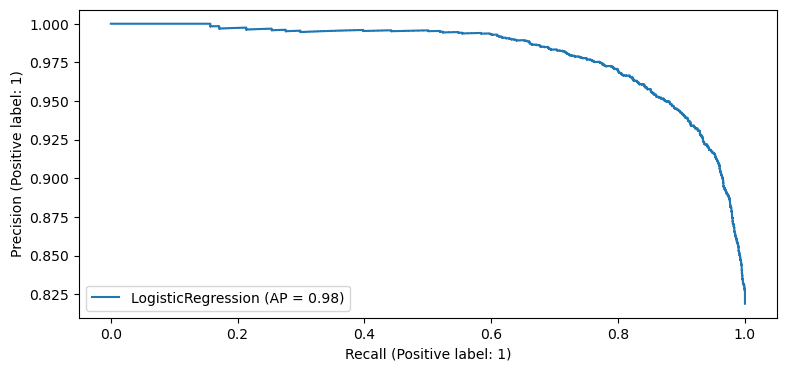

In [228]:
PrecisionRecallDisplay.from_estimator(log, 
                                      X_test_tf_idf, 
                                      y_test);

In [229]:
y_pred = log.predict(X_test_tf_idf)
y_pred_proba= log.predict_proba(X_test_tf_idf)[:,1]


log_AP_tfidf = average_precision_score(y_test, y_pred_proba)
log_tfidf_rec = recall_score(y_test, y_pred)
log_tfidf_f1 = f1_score(y_test,y_pred)

## Naive Bayes 

### Countvectorizer

In [230]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB(alpha=1.5)
nb.fit(X_train_count,y_train)

MultinomialNB(alpha=1.5)

In [231]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[ 588  232]
 [ 303 3406]]
Test_Set
              precision    recall  f1-score   support

           0       0.66      0.72      0.69       820
           1       0.94      0.92      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.80      0.82      0.81      4529
weighted avg       0.89      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.70      0.80      0.75      3281
           1       0.95      0.92      0.94     14831

    accuracy                           0.90     18112
   macro avg       0.83      0.86      0.84     18112
weighted avg       0.91      0.90      0.90     18112



In [232]:
model = MultinomialNB(alpha=1.5)
scores = cross_validate(model, 
                        X_train_count, 
                        y_train, 
                        scoring = scoring, 
                        cv = 10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, 
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.882840
train_accuracy     0.902790
test_f1            0.927385
train_f1           0.939721
test_recall        0.913694
train_recall       0.925367
test_precision     0.941509
train_precision    0.954529
dtype: float64

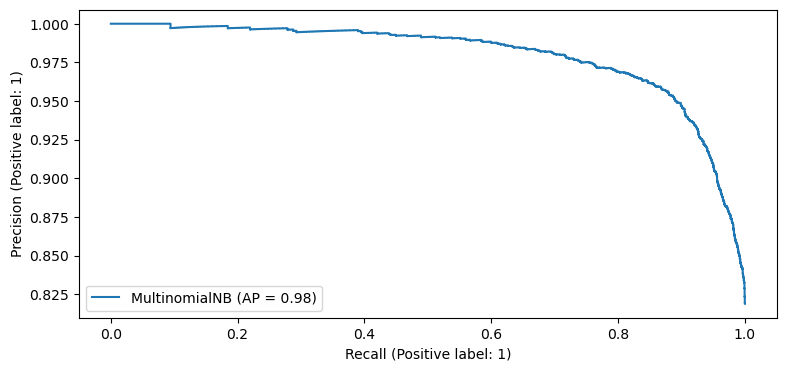

In [233]:
PrecisionRecallDisplay.from_estimator(nb, 
                                      X_test_count, 
                                      y_test);

In [234]:
y_pred = nb.predict(X_test_count)
y_pred_proba= nb.predict_proba(X_test_count)[:,1]

nb_AP_count = average_precision_score(y_test, y_pred_proba)
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [235]:
nb = BernoulliNB(alpha=0.7)
nb.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=0.7)

In [236]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[ 526  294]
 [ 251 3458]]
Test_Set
              precision    recall  f1-score   support

           0       0.68      0.64      0.66       820
           1       0.92      0.93      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.80      0.79      0.79      4529
weighted avg       0.88      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      3281
           1       0.95      0.93      0.94     14831

    accuracy                           0.91     18112
   macro avg       0.84      0.86      0.85     18112
weighted avg       0.91      0.91      0.91     18112



In [237]:
model = BernoulliNB(alpha = 0.7)
scores = cross_validate(model, 
                        X_train_tf_idf, 
                        y_train, 
                        scoring = scoring, 
                        cv = 10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.873731
train_accuracy     0.907397
test_f1            0.922333
train_f1           0.943175
test_recall        0.915717
train_recall       0.938515
test_precision     0.929071
train_precision    0.947882
dtype: float64

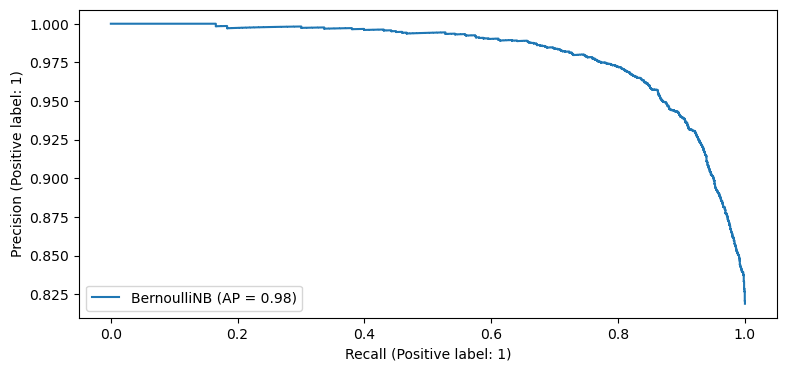

In [238]:
PrecisionRecallDisplay.from_estimator(nb, X_test_tf_idf, y_test);

In [239]:
y_pred = nb.predict(X_test_tf_idf)
y_pred_proba= nb.predict_proba(X_test_tf_idf)[:,1]


nb_AP_tfidf = average_precision_score(y_test, y_pred_proba)
nb_tfidf_rec = recall_score(y_test, y_pred)
nb_tfidf_f1 = f1_score(y_test,y_pred)

## Support Vector Machine (SVM)

### Countvectorizer

In [240]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C = 0.001, 
                class_weight="balanced", 
                random_state=101)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.001, class_weight='balanced', random_state=101)

In [241]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[ 690  130]
 [ 562 3147]]
Test_Set
              precision    recall  f1-score   support

           0       0.55      0.84      0.67       820
           1       0.96      0.85      0.90      3709

    accuracy                           0.85      4529
   macro avg       0.76      0.84      0.78      4529
weighted avg       0.89      0.85      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.57      0.88      0.69      3281
           1       0.97      0.85      0.91     14831

    accuracy                           0.86     18112
   macro avg       0.77      0.87      0.80     18112
weighted avg       0.90      0.86      0.87     18112



In [242]:
model = LinearSVC(C = 0.001, 
                  class_weight="balanced", 
                  random_state = 1647)
scores = cross_validate(model, 
                        X_train_count, 
                        y_train, 
                        scoring = scoring, 
                        cv = 10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, 
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.846842
train_accuracy     0.859050
test_f1            0.900650
train_f1           0.908484
test_recall        0.847886
train_recall       0.854389
test_precision     0.960451
train_precision    0.969894
dtype: float64

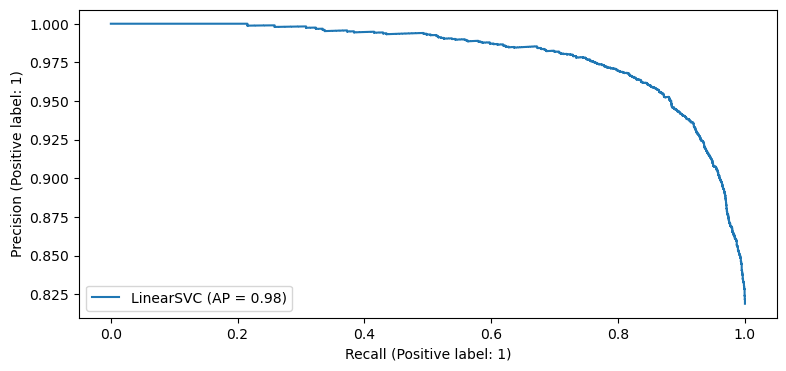

In [243]:
PrecisionRecallDisplay.from_estimator(svc, X_test_count, y_test);

In [244]:
y_pred = svc.predict(X_test_count)
decision_function= svc.decision_function(X_test_count)

svc_AP_count = average_precision_score(y_test, decision_function)
svc_count_rec = recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test,y_pred)

## TD-IDF

In [245]:
svc = LinearSVC(C = 0.03, 
                class_weight = "balanced", 
                random_state = 1647)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.03, class_weight='balanced', random_state=1647)

In [246]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[ 700  120]
 [ 534 3175]]
Test_Set
              precision    recall  f1-score   support

           0       0.57      0.85      0.68       820
           1       0.96      0.86      0.91      3709

    accuracy                           0.86      4529
   macro avg       0.77      0.85      0.79      4529
weighted avg       0.89      0.86      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.60      0.91      0.72      3281
           1       0.98      0.87      0.92     14831

    accuracy                           0.87     18112
   macro avg       0.79      0.89      0.82     18112
weighted avg       0.91      0.87      0.88     18112



In [247]:
model = LinearSVC(C = 0.03, 
                  class_weight = "balanced", 
                  random_state = 1647)
scores = cross_validate(model, 
                        X_train_tf_idf, 
                        y_train, 
                        scoring = scoring, 
                        cv = 10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, 
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.854682
train_accuracy     0.873466
test_f1            0.905877
train_f1           0.918035
test_recall        0.854022
train_recall       0.865380
test_precision     0.964469
train_precision    0.977515
dtype: float64

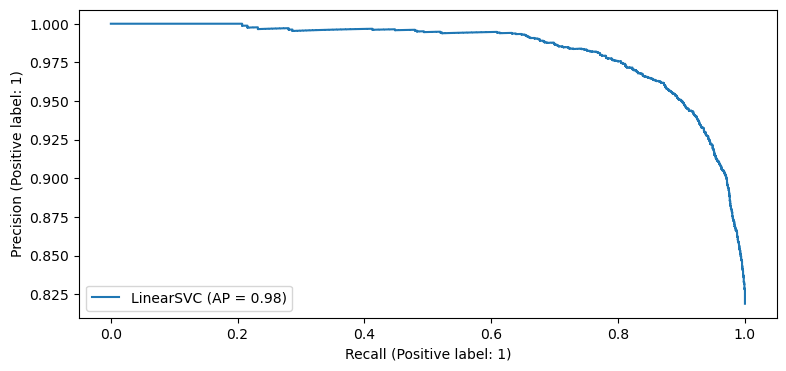

In [248]:
PrecisionRecallDisplay.from_estimator(svc, X_test_tf_idf, y_test);

In [249]:
y_pred = svc.predict(X_test_tf_idf)
decision_function= svc.decision_function(X_test_tf_idf)

svc_AP_tfidf = average_precision_score(y_test, decision_function)
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test,y_pred)

## Random Forest

### Countvectorizer

In [250]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, 
                            max_depth = 7, 
                            random_state = 1647, 
                            n_jobs = -1, 
                            class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_jobs=-1,
                       random_state=1647)

In [251]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[ 632  188]
 [ 578 3131]]
Test_Set
              precision    recall  f1-score   support

           0       0.52      0.77      0.62       820
           1       0.94      0.84      0.89      3709

    accuracy                           0.83      4529
   macro avg       0.73      0.81      0.76      4529
weighted avg       0.87      0.83      0.84      4529

Train_Set
              precision    recall  f1-score   support

           0       0.56      0.84      0.67      3281
           1       0.96      0.85      0.90     14831

    accuracy                           0.85     18112
   macro avg       0.76      0.85      0.79     18112
weighted avg       0.89      0.85      0.86     18112



In [252]:
model = RandomForestClassifier(100, 
                               max_depth = 7, 
                               random_state = 1647, 
                               n_jobs = -1, 
                               class_weight="balanced")
scores = cross_validate(model, 
                        X_train_count, 
                        y_train, 
                        scoring = scoring, 
                        cv = 10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, 
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.832983
train_accuracy     0.854338
test_f1            0.891985
train_f1           0.905842
test_recall        0.842222
train_recall       0.855768
test_precision     0.948064
train_precision    0.962182
dtype: float64

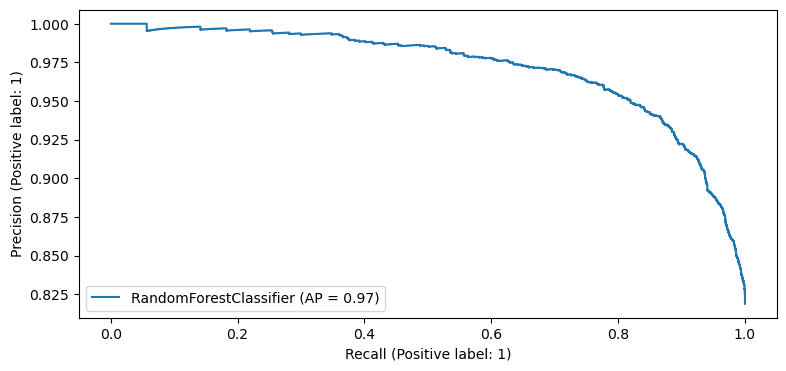

In [253]:
PrecisionRecallDisplay.from_estimator(rf, X_test_count, y_test);

In [254]:
y_pred = rf.predict(X_test_count)
y_pred_proba= rf.predict_proba(X_test_count)[:,1]

rf_AP_count = average_precision_score(y_test, y_pred_proba)
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [255]:
rf = RandomForestClassifier(100, 
                            max_depth = 7, 
                            random_state = 1647, 
                            n_jobs = -1, 
                            class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_jobs=-1,
                       random_state=1647)

In [256]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[ 643  177]
 [ 634 3075]]
Test_Set
              precision    recall  f1-score   support

           0       0.50      0.78      0.61       820
           1       0.95      0.83      0.88      3709

    accuracy                           0.82      4529
   macro avg       0.72      0.81      0.75      4529
weighted avg       0.87      0.82      0.83      4529

Train_Set
              precision    recall  f1-score   support

           0       0.54      0.87      0.67      3281
           1       0.97      0.84      0.90     14831

    accuracy                           0.84     18112
   macro avg       0.75      0.85      0.78     18112
weighted avg       0.89      0.84      0.85     18112



In [257]:
model = RandomForestClassifier(100, 
                               max_depth = 7, 
                               random_state = 42, 
                               n_jobs = -1, 
                               class_weight="balanced")
scores = cross_validate(model, 
                        X_train_tf_idf, 
                        y_train, 
                        scoring = scoring, 
                        cv = 10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, 
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.817690
train_accuracy     0.844443
test_f1            0.880556
train_f1           0.898133
test_recall        0.821185
train_recall       0.837825
test_precision     0.949375
train_precision    0.967905
dtype: float64

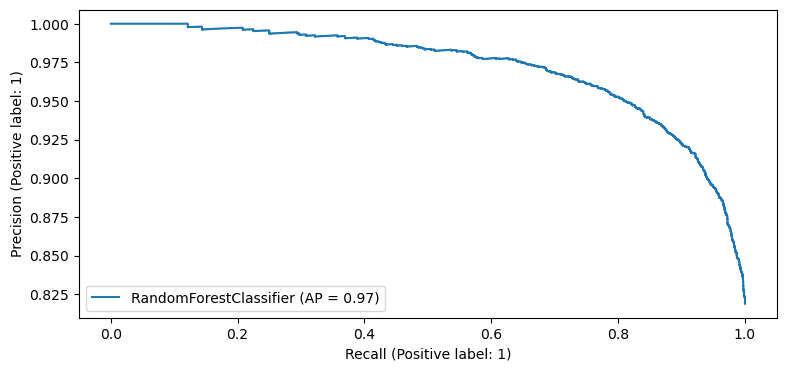

In [258]:
PrecisionRecallDisplay.from_estimator(rf, X_test_tf_idf, y_test);

In [259]:
y_pred = rf.predict(X_test_tf_idf)
y_pred_proba= rf.predict_proba(X_test_tf_idf)[:,1]

rf_AP_tfidf = average_precision_score(y_test, y_pred_proba)
rf_tfidf_rec = recall_score(y_test, y_pred)
rf_tfidf_f1 = f1_score(y_test,y_pred)

## Ada Boosting

### Countvectorizer

In [260]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators= 200, random_state = 1647)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=200, random_state=1647)

In [261]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[ 426  394]
 [ 169 3540]]
Test_Set
              precision    recall  f1-score   support

           0       0.72      0.52      0.60       820
           1       0.90      0.95      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.81      0.74      0.76      4529
weighted avg       0.87      0.88      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.76      0.59      0.66      3281
           1       0.91      0.96      0.94     14831

    accuracy                           0.89     18112
   macro avg       0.84      0.77      0.80     18112
weighted avg       0.88      0.89      0.89     18112



In [262]:
model = AdaBoostClassifier(n_estimators= 200, 
                           random_state = 1647)
scores = cross_validate(model, 
                        X_train_count, 
                        y_train, 
                        scoring = scoring, 
                        cv = 10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, 
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.875276
train_accuracy     0.889834
test_f1            0.925737
train_f1           0.934404
test_recall        0.949363
train_recall       0.958233
test_precision     0.903295
train_precision    0.911732
dtype: float64

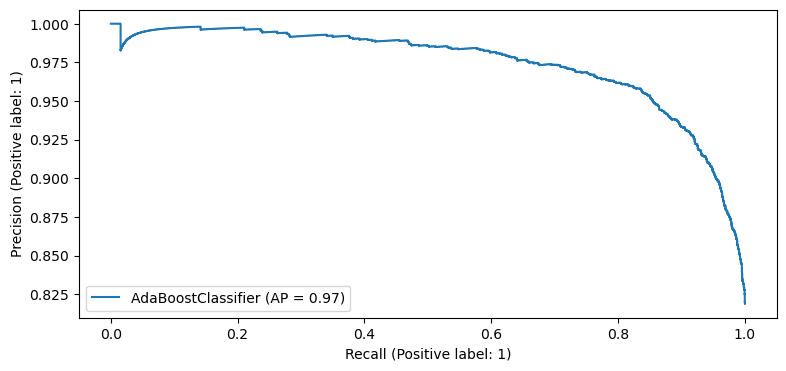

In [263]:
PrecisionRecallDisplay.from_estimator(ada, X_test_count, y_test);

In [264]:
y_pred = ada.predict(X_test_count)
y_pred_proba= ada.predict_proba(X_test_count)[:,1]

ada_AP_count = average_precision_score(y_test, y_pred_proba)
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [265]:
ada = AdaBoostClassifier(n_estimators = 200, 
                         random_state = 1647, 
                         learning_rate = 0.7)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(learning_rate=0.7, n_estimators=200, random_state=1647)

In [266]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[ 406  414]
 [ 151 3558]]
Test_Set
              precision    recall  f1-score   support

           0       0.73      0.50      0.59       820
           1       0.90      0.96      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.81      0.73      0.76      4529
weighted avg       0.87      0.88      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.80      0.57      0.66      3281
           1       0.91      0.97      0.94     14831

    accuracy                           0.90     18112
   macro avg       0.85      0.77      0.80     18112
weighted avg       0.89      0.90      0.89     18112



In [267]:
model = AdaBoostClassifier(n_estimators = 200, 
                           random_state = 1647, 
                           learning_rate = 0.7)
scores = cross_validate(model, 
                        X_train_tf_idf, 
                        y_train, 
                        scoring = scoring, 
                        cv = 10, 
                        return_train_score=True)
df_scores = pd.DataFrame(scores, 
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.876822
train_accuracy     0.895533
test_f1            0.927223
train_f1           0.938176
test_recall        0.958397
train_recall       0.967987
test_precision     0.898037
train_precision    0.910146
dtype: float64

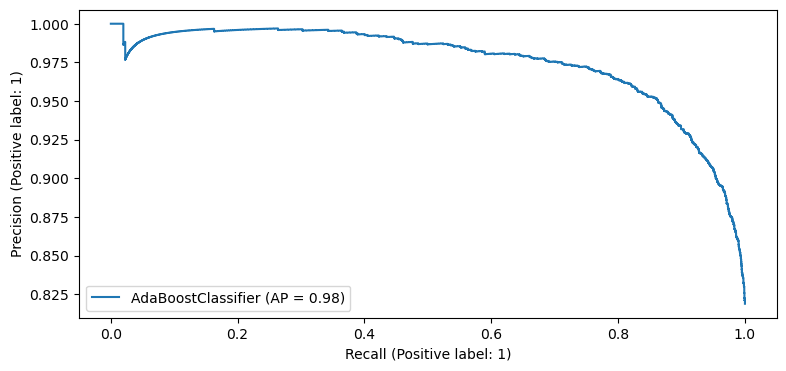

In [195]:
PrecisionRecallDisplay.from_estimator(ada, X_test_tf_idf, y_test);

In [269]:
y_pred = ada.predict(X_test_tf_idf)
y_pred_proba= ada.predict_proba(X_test_tf_idf)[:,1]

ada_AP_tfidf = average_precision_score(y_test, y_pred_proba)
ada_tfidf_rec = recall_score(y_test, y_pred)
ada_tfidf_f1 = f1_score(y_test,y_pred)

## DL modeling

In [268]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [270]:
X

array(['absolutely wonderful silky sexy comfortable',
       'love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite',
       'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper',
       ...,
       'fit well top see never would worked im glad able try store didnt order online different fabric would great',
       'bought dress wedding summer cute unfortunately fit isnt perfect medium fit waist perfectly way long big bust shoulder wanted spend money could get tailored felt like might worth side note dress delivered nordstrom tag found much cheaper looking',
       'dress lovely platinum feminine fit perfectly easy wear c

### Tokenization

In [271]:
num_words = 15001 # 1 fazlasını yazıyoruz. 

tokenizer = Tokenizer(num_words=num_words)

In [272]:
tokenizer.fit_on_texts(X)

### Creating word index

In [273]:
tokenizer.word_index

{'dress': 1,
 'fit': 2,
 'love': 3,
 'top': 4,
 'size': 5,
 'like': 6,
 'color': 7,
 'look': 8,
 'wear': 9,
 'great': 10,
 'im': 11,
 'would': 12,
 'fabric': 13,
 'small': 14,
 'really': 15,
 'ordered': 16,
 'little': 17,
 'perfect': 18,
 'one': 19,
 'flattering': 20,
 'soft': 21,
 'well': 22,
 'back': 23,
 'comfortable': 24,
 'cute': 25,
 'nice': 26,
 'bought': 27,
 'beautiful': 28,
 'bit': 29,
 'material': 30,
 'shirt': 31,
 'large': 32,
 'much': 33,
 'sweater': 34,
 'length': 35,
 'run': 36,
 'jean': 37,
 'also': 38,
 'work': 39,
 'petite': 40,
 'got': 41,
 'long': 42,
 'short': 43,
 'waist': 44,
 'quality': 45,
 'medium': 46,
 'skirt': 47,
 'think': 48,
 'pretty': 49,
 'even': 50,
 'retailer': 51,
 'x': 52,
 'make': 53,
 'feel': 54,
 'tried': 55,
 'pant': 56,
 'store': 57,
 'usually': 58,
 'get': 59,
 'way': 60,
 'sleeve': 61,
 'good': 62,
 'could': 63,
 'big': 64,
 'made': 65,
 'cut': 66,
 'go': 67,
 'dont': 68,
 'didnt': 69,
 'still': 70,
 'style': 71,
 'right': 72,
 'black': 73,

In [274]:
len(tokenizer.word_index)

11986

### Converting tokens to numeric

In [275]:
X_num_tokens = tokenizer.texts_to_sequences(X)

### Maximum number of tokens for all documents¶

In [276]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [277]:
num_tokens.mean()

28.12252109005786

In [278]:
num_tokens.max()

58

In [279]:
max_tokens = 58

In [280]:
sum(num_tokens <= max_tokens)

22641

In [281]:
sum(num_tokens <= max_tokens) / len(num_tokens)

1.0

### Fixing token counts of all documents (pad_sequences)

In [282]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens, padding="pre")

In [283]:
X_pad.shape

(22641, 58)

### Train Set Split

In [31]:
from sklearn.model_selection import train_test_split

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, 
                                                    y, 
                                                    test_size = 0.1, 
                                                    stratify = y, 
                                                    random_state = 1647)


### Modeling

In [286]:
model = Sequential()

In [287]:
embedding_size = 50

In [52]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))

In [288]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))
model.add(Dropout(0.2))

model.add(GRU(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=25, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(units=12))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [289]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 58, 50)            750050    
                                                                 
 dropout (Dropout)           (None, 58, 50)            0         
                                                                 
 gru (GRU)                   (None, 58, 50)            15300     
                                                                 
 dropout_1 (Dropout)         (None, 58, 50)            0         
                                                                 
 gru_1 (GRU)                 (None, 58, 25)            5775      
                                                                 
 dropout_2 (Dropout)         (None, 58, 25)            0         
                                                                 
 gru_2 (GRU)                 (None, 12)               

In [290]:
optimizer = Adam(learning_rate=0.001)

In [291]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["Recall"])

In [292]:
model.summary() 

# embedding_size * num_words ==> 50 * 15001 = 750050

# 3 x (n2 + nm + 2n) m= input, n= output
# (50*50 + 50*50 + 2*50)*3 = 15.300 ==> m = 50, n = 50 
# (25*25 + 50*25 + 2*25)*3 = 5775   ==> m = 50, n = 25
# (12*12 + 25*12 + 2*12)*3 = 1404   ==> m = 24, n = 12
# 12*1 + 1 = 13

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 58, 50)            750050    
                                                                 
 dropout (Dropout)           (None, 58, 50)            0         
                                                                 
 gru (GRU)                   (None, 58, 50)            15300     
                                                                 
 dropout_1 (Dropout)         (None, 58, 50)            0         
                                                                 
 gru_1 (GRU)                 (None, 58, 25)            5775      
                                                                 
 dropout_2 (Dropout)         (None, 58, 25)            0         
                                                                 
 gru_2 (GRU)                 (None, 12)               

In [293]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = "val_recall", 
                           mode = "max", 
                           verbose = 1, 
                           patience = 2, 
                           restore_best_weights = True)

In [294]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight = 'balanced', 
                                                     y = y_train)
pd.Series(classes_weights).unique()

array([0.61060833, 2.76022758])

In [295]:
model.fit(X_train, y_train, epochs=10, batch_size=128, sample_weight=classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
160/160 [==============================] - 23s 103ms/step - loss: 0.4775 - recall: 0.7525 - val_loss: 0.4355 - val_recall: 0.7725
Epoch 2/10
160/160 [==============================] - 16s 100ms/step - loss: 0.3040 - recall: 0.8625 - val_loss: 0.3703 - val_recall: 0.8259
Epoch 3/10
160/160 [==============================] - 16s 98ms/step - loss: 0.2505 - recall: 0.8852 - val_loss: 0.3710 - val_recall: 0.8259
Epoch 4/10
160/160 [==============================] - 16s 102ms/step - loss: 0.2081 - recall: 0.9037 - val_loss: 0.3439 - val_recall: 0.8733
Epoch 5/10
160/160 [==============================] - 16s 100ms/step - loss: 0.1768 - recall: 0.9197 - val_loss: 0.4258 - val_recall: 0.8642
Epoch 6/10
160/160 [==============================] - 17s 103ms/step - loss: 0.1501 - recall: 0.9298 - val_loss: 0.3903 - val_recall: 0.8873
Epoch 7/10
160/160 [==============================] - 16s 101ms/step - loss: 0.1322 - recall: 0.9427 - val_loss: 0.4873 - val_recall: 0.8582
Epoch 8/10
160

### Model Evaluation

In [298]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head(10)

loss    recall  val_loss  val_recall
0  0.477528  0.752532  0.435456    0.772507
1  0.303983  0.862511  0.370280    0.825876
2  0.250539  0.885166  0.370989    0.825876
3  0.208109  0.903686  0.343880    0.873315
4  0.176805  0.919748  0.425800    0.864151
5  0.150148  0.929757  0.390324    0.887332
6  0.132169  0.942703  0.487316    0.858221
7  0.116986  0.947558  0.433183    0.909434
8  0.114361  0.949715  0.480100    0.874933
9  0.098490  0.958645  0.489652    0.905121

<Axes: >

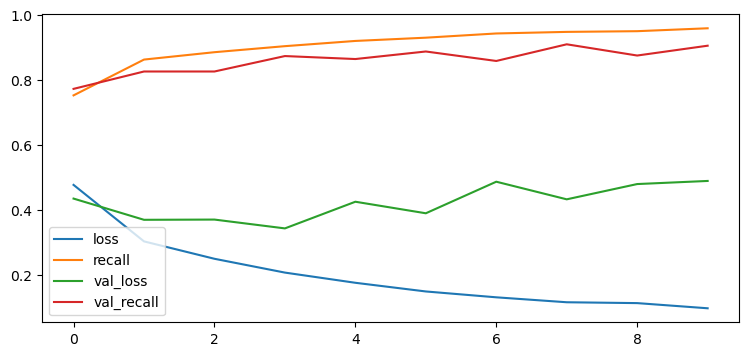

In [297]:
model_loss.plot()

In [299]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

71/71 [==============================] - 2s 15ms/step
[[ 284  126]
 [ 168 1687]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.63      0.69      0.66       410
           1       0.93      0.91      0.92      1855

    accuracy                           0.87      2265
   macro avg       0.78      0.80      0.79      2265
weighted avg       0.88      0.87      0.87      2265



In [300]:
y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

637/637 [==============================] - 9s 15ms/step
[[ 3604    87]
 [  507 16178]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.98      0.92      3691
           1       0.99      0.97      0.98     16685

    accuracy                           0.97     20376
   macro avg       0.94      0.97      0.95     20376
weighted avg       0.97      0.97      0.97     20376



71/71 [==============================] - 1s 15ms/step


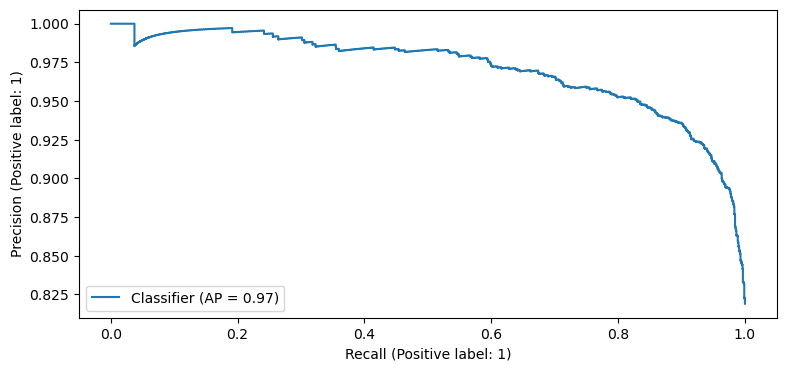

In [301]:
from sklearn.metrics import PrecisionRecallDisplay

y_pred_proba = model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)

In [302]:
from sklearn.metrics import average_precision_score

average_precision_score(y_test, y_pred_proba)

0.9709082077431401

In [303]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

## BERT Modeling

In [331]:
import tensorflow as tf
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0" 

print("All devices: ", tf.config.list_logical_devices('GPU'))

strategy = tf.distribute.OneDeviceStrategy('GPU')

All devices:  []


### Tokenization

In [305]:
from transformers import AutoTokenizer #BertTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# For every sentence...
num_of_sent_tokens = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    
    input_ids = tokenizer.encode(sent, 
                                 add_special_tokens=True)
    num_of_sent_tokens.append(len(input_ids))

print('Max sentence length: ', max(num_of_sent_tokens))

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Max sentence length:  75


In [306]:
np.array(num_of_sent_tokens).mean()

33.02658893158429

In [307]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, 
                                                        y, 
                                                        test_size = 0.1, 
                                                        stratify = y, 
                                                        random_state = 1647)

In [308]:
all_sentence_tokens = tokenizer(list(X), 
                                max_length = 75, 
                                truncation = True,
                                padding = 'max_length', 
                                add_special_tokens = True)

In [309]:
np.array(all_sentence_tokens['input_ids'])

array([[ 101, 7078, 6919, ...,    0,    0,    0],
       [ 101, 2293, 4377, ...,    0,    0,    0],
       [ 101, 2152, 3246, ...,    0,    0,    0],
       ...,
       [ 101, 4906, 2092, ...,    0,    0,    0],
       [ 101, 4149, 4377, ...,    0,    0,    0],
       [ 101, 4377, 8403, ...,    0,    0,    0]])

In [310]:
np.array(all_sentence_tokens['attention_mask'])

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [311]:
def transformation(X):
    # set array dimensions
    seq_len = 75

    all_sentence_tokens = tokenizer(list(X), 
                                      max_length = seq_len, 
                                      truncation = True,
                                      padding = 'max_length', 
                                      add_special_tokens = True) 

    return np.array(all_sentence_tokens['input_ids']), np.array(all_sentence_tokens['attention_mask'])

In [312]:
Xids_train, Xmask_train = transformation(X_train2)
Xids_test, Xmask_test = transformation(X_test2)

In [313]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (20376, 75)
Xmask_train.shape : (20376, 75)
Xids_test.shape   : (2265, 75)
Xmask_test.shape  : (2265, 75)


In [314]:
labels_train = y_train2.reshape(-1,1)
labels_train

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [315]:
labels_test = y_test2.reshape(-1,1)
labels_test

array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [1]], dtype=int64)

### Transformation Matrix to Tensorflow tensor

In [316]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, 
                                                    Xmask_train, 
                                                    labels_train))
dataset_train

<_TensorSliceDataset element_spec=(TensorSpec(shape=(75,), dtype=tf.int32, name=None), TensorSpec(shape=(75,), dtype=tf.int32, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [317]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, 
                                                   Xmask_test, 
                                                   labels_test))
dataset_test

<_TensorSliceDataset element_spec=(TensorSpec(shape=(75,), dtype=tf.int32, name=None), TensorSpec(shape=(75,), dtype=tf.int32, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [318]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [319]:
# then we use the dataset map method to apply this transformation
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [320]:
dataset_train

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(75,), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(75,), dtype=tf.int32, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [321]:
dataset_test

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(75,), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(75,), dtype=tf.int32, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

### Batch Size

In [322]:
batch_size = 32

# batch_size 
# fit into a batch of 32
train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)

In [332]:
!pip install tf-models-official --user


  Using cached tf_models_official-2.12.0-py2.py3-none-any.whl (2.6 MB)
  Using cached tf_models_official-2.11.6-py2.py3-none-any.whl (2.4 MB)
  Using cached tensorflow-2.11.1-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached tf_models_official-2.11.5-py2.py3-none-any.whl (2.4 MB)
  Using cached tf_models_official-2.11.4-py2.py3-none-any.whl (2.4 MB)
  Using cached tf_models_official-2.11.3-py2.py3-none-any.whl (2.3 MB)
  Using cached tf_models_official-2.11.2-py2.py3-none-any.whl (2.3 MB)
  Using cached tf_models_official-2.11.0-py2.py3-none-any.whl (2.3 MB)
  Using cached tf_models_official-2.10.1-py2.py3-none-any.whl (2.2 MB)
  Using cached tensorflow-2.10.1-cp310-cp310-win_amd64.whl (455.9 MB)
  Using cached tensorflow_text-2.10.0-cp310-cp310-win_amd64.whl (5.0 MB)
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.12.0
    Uninstalling tensorflow-2.12.0:
      Successfully uninstalled tensorflow-2.12.0
  Rolling back uninstall of tensorflow
  Moving to

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\User\\AppData\\Roaming\\Python\\Python310\\site-packages\\tensorflow\\compiler\\tf2tensorrt\\_pywrap_py_utils.pyd'
Check the permissions.



In [ ]:
from official.nlp import optimization
epochs = 2
#batch_size = 32
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

### Creating optimization

### Creating Model with TPU

In [333]:
def create_model():
    from transformers import TFAutoModel #TFBertModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = Dense(80, activation='relu')(embeddings)
    x = BatchNormalization()(x) 
    x = Dropout(0.1, name="dropout")(x) #0.1
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)

In [ ]:
with strategy.scope():
    #from tensorflow.keras.optimizers import Adam
    from tensorflow.keras.losses import BinaryCrossentropy
    from tensorflow.keras.metrics import Recall
  
    #optimizer = Adam(learning_rate=2e-5) #3e-5, 5e-5
    loss = BinaryCrossentropy()
    recall = Recall()
    model3 = create_model()
    model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

model3.summary()

### Model Fiting

In [ ]:
model3.fit(train_ds, validation_data= val_ds, epochs=epochs) 

### Model evaluation

In [ ]:
model_loss = pd.DataFrame(model3.history.history)
model_loss.head()

In [ ]:
model_loss.plot()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5

print(classification_report(y_test2, y_pred))

In [ ]:
y_train_pred = model3.predict(train_ds) >= 0.5

print(classification_report(y_train2, y_train_pred)) 

In [ ]:
y_pred_proba = model3.predict(val_ds)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)

In [ ]:
average_precision_score(y_test2, y_pred_proba)

In [ ]:
BERT_without_weighted_AP = average_precision_score(y_test2, y_pred_proba)
BERT_without_weighted_f1 = f1_score(y_test2, y_pred)
BERT_without_weighted_rec = recall_score(y_test2, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

In [ ]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count", 
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf", 
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL", "BERT_Weighted", "BERT_Without_Weighted"],
                        
                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1, rf_count_f1, ada_count_f1, nb_tfidf_f1, 
                                     log_tfidf_f1, svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1, BERT_with_weighted_f1, 
                                     BERT_without_weighted_f1],
                        
                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, rf_count_rec, ada_count_rec, nb_tfidf_rec, 
                                         log_tfidf_rec, svc_tfidf_rec, rf_tfidf_rec, ada_tfidf_rec, DL_rec, BERT_with_weighted_rec, 
                                         BERT_without_weighted_rec],
                        
                        "Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count, ada_AP_count, nb_AP_tfidf, 
                                                    log_AP_tfidf, svc_AP_tfidf, rf_AP_tfidf, ada_AP_tfidf, DL_AP, BERT_with_weighted_AP, 
                                                    BERT_without_weighted_AP]})


plt.figure(figsize=(10,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score", 
                              ascending=False)
ax=sns.barplot(x="Recall_Score", 
               y="Model", 
               data=compare, 
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score", 
                              ascending=False)
ax=sns.barplot(x="F1_Score", 
               y="Model", 
               data=compare, 
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score", 
                              ascending=False)
ax=sns.barplot(x="Average_Precision_Score", 
               y="Model", 
               data=compare, 
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___